# Project: Creating a Stock Dashboard

## Analyzing Stocks with Python and xlwings

In [1]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data 
import seaborn as sns
from statsmodels.formula.api import ols
plt.style.use("seaborn")

In [2]:
wb = xw.Book("Stocks.xlsx")

In [3]:
db_s = wb.sheets[0]
prices_s = wb.sheets[1]

In [4]:
symbol = db_s.range("C7").value
start = db_s.range("F7").value
end = db_s.range("I7").value
benchmark = db_s.range("K20").value
freq = db_s.range("K39").value

In [5]:
print(symbol, start, end, benchmark, freq, sep = "|")

MSFT|2020-01-01 00:00:00|2020-06-30 00:00:00|^DJI|D


In [6]:
df = data.DataReader(name = [symbol, benchmark], data_source = "yahoo", start = start, end = end).Close
df

Symbols,MSFT,^DJI
Date,,
2020-01-02,160.619995,28868.800781
2020-01-03,158.619995,28634.880859
2020-01-06,159.029999,28703.380859
2020-01-07,157.580002,28583.679688
2020-01-08,160.089996,28745.089844
...,...,...
2020-06-24,197.839996,25445.939453
2020-06-25,200.339996,25745.599609
2020-06-26,196.330002,25015.550781


In [7]:
df.rename(columns = {benchmark:benchmark.replace("^", "")}, inplace = True)

In [8]:
df

Symbols,MSFT,DJI
Date,,
2020-01-02,160.619995,28868.800781
2020-01-03,158.619995,28634.880859
2020-01-06,159.029999,28703.380859
2020-01-07,157.580002,28583.679688
2020-01-08,160.089996,28745.089844
...,...,...
2020-06-24,197.839996,25445.939453
2020-06-25,200.339996,25745.599609
2020-06-26,196.330002,25015.550781


In [9]:
benchmark = benchmark.replace("^", "")
benchmark

'DJI'

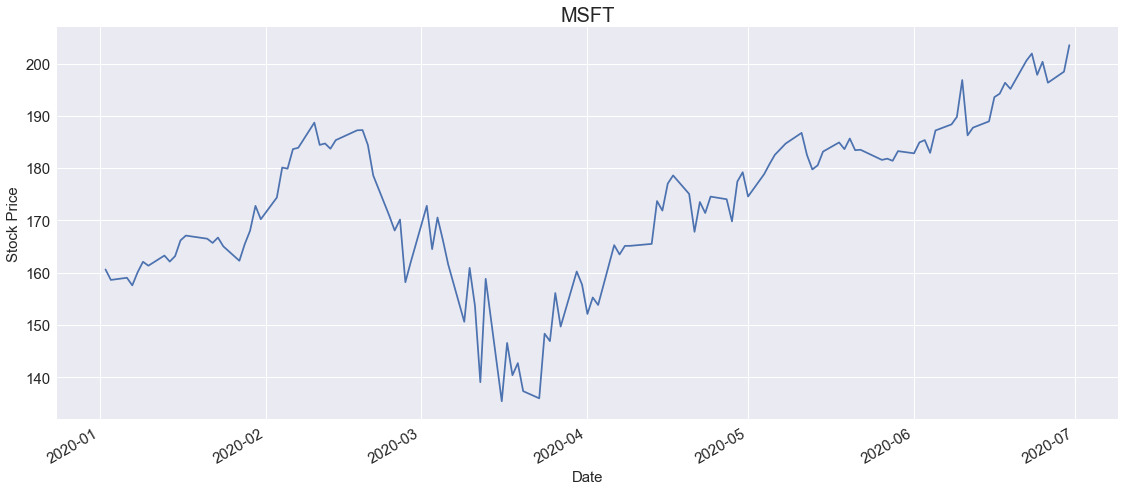

In [10]:
chart = plt.figure(figsize = (19, 8))
df[symbol].plot(fontsize = 15)
plt.title(symbol, fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Stock Price", fontsize = 15)
plt.show()

In [11]:
db_s.pictures.add(chart, name = "Chart", update = True, 
                   left = db_s.range("C8").left, 
                   top = db_s.range("C8").top,
                   scale = 0.47)

<Picture 'Chart' in <Sheet [Stocks.xlsx]Dashboard>>

In [12]:
first = df.iloc[0,0]
first

160.6199951171875

In [13]:
high = df.iloc[:, 0].max()
high

203.50999450683594

In [14]:
low = df.iloc[:, 0].min()
low

135.4199981689453

In [15]:
last = df.iloc[-1, 0]
last

203.50999450683594

In [16]:
total_change = last / first - 1
total_change

0.26702777171893266

In [17]:
db_s.range("H12").options(transpose = True).value = [first, high, low, last, total_change]

In [18]:
norm = df.div(df.iloc[0]).mul(100)
norm

Symbols,MSFT,DJI
Date,,
2020-01-02,100.000000,100.000000
2020-01-03,98.754825,99.189714
2020-01-06,99.010088,99.426994
2020-01-07,98.107338,99.012356
2020-01-08,99.670029,99.571472
...,...,...
2020-06-24,123.172707,88.143389
2020-06-25,124.729176,89.181396
2020-06-26,122.232604,86.652546


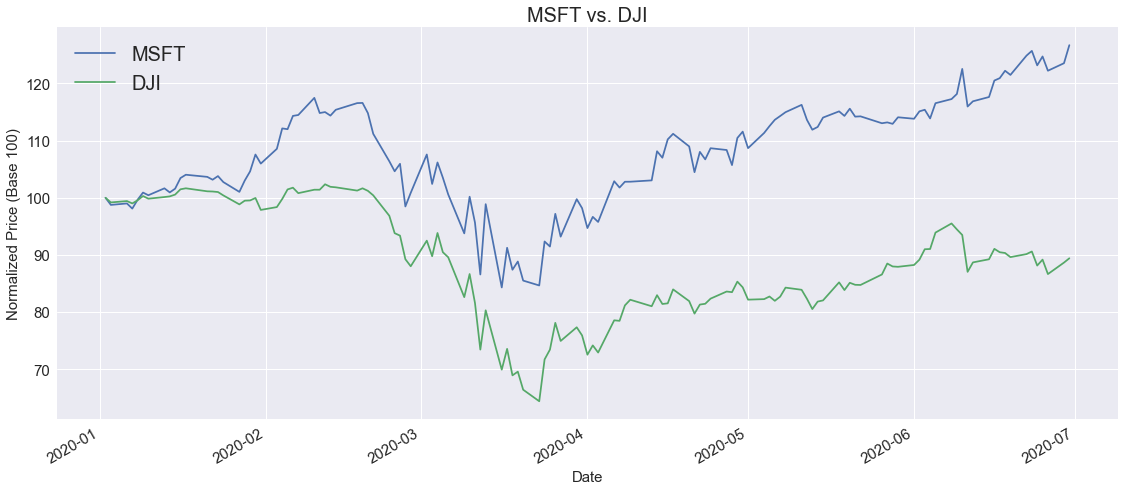

In [19]:
chart2 = plt.figure(figsize = (19, 8))
norm[symbol].plot(fontsize = 15)
norm[benchmark].plot(fontsize = 15)
plt.title(symbol + " vs. " + benchmark, fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Normalized Price (Base 100)", fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [20]:
db_s.pictures.add(chart2, name = "Chart2", update = True, 
                   left = db_s.range("C21").left, 
                   top = db_s.range("C21").top + 10,
                   scale = 0.46)

<Picture 'Chart2' in <Sheet [Stocks.xlsx]Dashboard>>

In [21]:
ret  = df.resample(freq).last().dropna().pct_change().dropna()
ret

Symbols,MSFT,DJI
Date,,
2020-01-03,-0.012452,-0.008103
2020-01-06,0.002585,0.002392
2020-01-07,-0.009118,-0.004170
2020-01-08,0.015928,0.005647
2020-01-09,0.012493,0.007369
...,...,...
2020-06-24,-0.020158,-0.027151
2020-06-25,0.012636,0.011776
2020-06-26,-0.020016,-0.028356


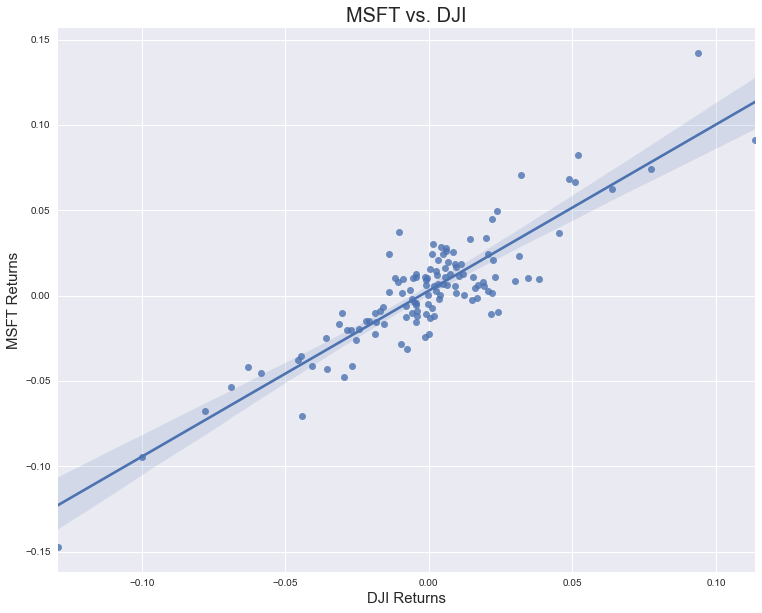

In [22]:
chart3 = plt.figure(figsize = (12.5, 10))
sns.regplot(data = ret, x = benchmark, y = symbol)
plt.title(symbol + " vs. " + benchmark, fontsize = 20)
plt.xlabel(benchmark + " Returns", fontsize = 15)
plt.ylabel(symbol + " Returns", fontsize = 15)
plt.show()

In [23]:
db_s.pictures.add(chart3, name = "Chart3", update = True, 
                   left = db_s.range("C40").left, 
                   top = db_s.range("C40").top,
                   scale = 0.47)

<Picture 'Chart3' in <Sheet [Stocks.xlsx]Dashboard>>

In [26]:
model = ols(symbol + "~" + benchmark, data = ret)

In [27]:
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     449.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           1.03e-42
Time:                        12:36:42   Log-Likelihood:                 337.98
No. Observations:                 124   AIC:                            -672.0
Df Residuals:                     122   BIC:                            -666.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0029      0.001      2.020      0.0

In [29]:
obs = len(ret)
corr_coef = ret.corr().iloc[0,1]
beta = results.params[1]
r_sq = results.rsquared
t_stat = results.tvalues[1]
p_value = results.pvalues[1]
conf_left = results.conf_int().iloc[1,0]
conf_right = results.conf_int().iloc[1,1]
interc = results.params[0]

In [30]:
regr_list = [obs, corr_coef, beta, r_sq, t_stat, p_value, conf_left, conf_right, interc]

In [31]:
regr_list

[124,
 0.8868027319477154,
 0.9732745551173405,
 0.786419085389931,
 21.194624014216572,
 1.0289777950861313e-42,
 0.8823697016164956,
 1.0641794086181855,
 0.002898448814264124]

In [32]:
db_s.range("K41").options(transpose = True).value = regr_list

In [33]:
prices_s.range("A1").expand().clear_contents()


In [34]:
prices_s.range("A1").value = df

## Running with Run main

In [35]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data 
import seaborn as sns
from statsmodels.formula.api import ols
plt.style.use("seaborn")

In [36]:
wb = xw.Book("Stocks.xlsx")

In [37]:
def main():
    
    #connect
    #wb = xw.Book.caller()
    
    #define sheets
    db_s = wb.sheets[0]
    prices_s = wb.sheets[1]
    
    #read values
    symbol = db_s.range("C7").value
    start = db_s.range("F7").value
    end = db_s.range("I7").value
    benchmark = db_s.range("K20").value
    freq = db_s.range("K39").value
    
    #load stock data and create df
    df = data.DataReader(name = [symbol, benchmark], data_source = "yahoo",
                         start = start, end = end).Close
    df.rename(columns = {benchmark:benchmark.replace("^", "")}, inplace = True)
    
    benchmark = benchmark.replace("^", "")
    
    #create chart 
    chart = plt.figure(figsize = (19, 8))
    df[symbol].plot(fontsize = 15)
    plt.title(symbol, fontsize = 20)
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel("Stock Price", fontsize = 15)
    db_s.pictures.add(chart, name = "Chart", update = True, 
                      left = db_s.range("C8").left, 
                      top = db_s.range("C8").top,
                      scale = 0.47)
    
    #calculate and write metrics
    first = df.iloc[0,0]
    high = df.iloc[:, 0].max()
    low = df.iloc[:, 0].min()
    last = df.iloc[-1, 0]
    total_change = last / first - 1
    db_s.range("H12").options(transpose = True).value = [first, high, low, last, total_change]
    
    #create chart2
    norm = df.div(df.iloc[0]).mul(100)
    chart2 = plt.figure(figsize = (19, 8))
    norm[symbol].plot(fontsize = 15)
    norm[benchmark].plot(fontsize = 15)
    plt.title(symbol + " vs. " + benchmark, fontsize = 20)
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel("Normalized Price (Base 100)", fontsize = 15)
    plt.legend(fontsize = 20)
    db_s.pictures.add(chart2, name = "Chart2", update = True, 
                      left = db_s.range("C21").left, 
                      top = db_s.range("C21").top + 10,
                      scale = 0.46)
    
    #calculate returns
    ret  = df.resample(freq).last().dropna().pct_change().dropna()
   
    #create chart3
    chart3 = plt.figure(figsize = (12.5, 10))
    sns.regplot(data = ret, x = benchmark, y = symbol)
    plt.title(symbol + " vs. " + benchmark, fontsize = 20)
    plt.xlabel(benchmark + " Returns", fontsize = 15)
    plt.ylabel(symbol + " Returns", fontsize = 15)
    db_s.pictures.add(chart3, name = "Chart3", update = True, 
                      left = db_s.range("C40").left, 
                      top = db_s.range("C40").top,
                      scale = 0.47)
    
    #Linear Regression
    model = ols(symbol + "~" + benchmark, data = ret)
    results = model.fit()
    
    #calculate & write Regression Statistics
    obs = len(ret)
    corr_coef = ret.corr().iloc[0,1]
    beta = results.params[1]
    r_sq = results.rsquared
    t_stat = results.tvalues[1]
    p_value = results.pvalues[1]
    conf_left = results.conf_int().iloc[1,0]
    conf_right = results.conf_int().iloc[1,1]
    interc = results.params[0]
    
    regr_list = [obs, corr_coef, beta, r_sq, t_stat, 
                 p_value, conf_left, conf_right, interc]
    db_s.range("K41").options(transpose = True).value = regr_list
    
    #write raw data
    prices_s.range("A1").expand().clear_contents()
    prices_s.range("A1").value = df

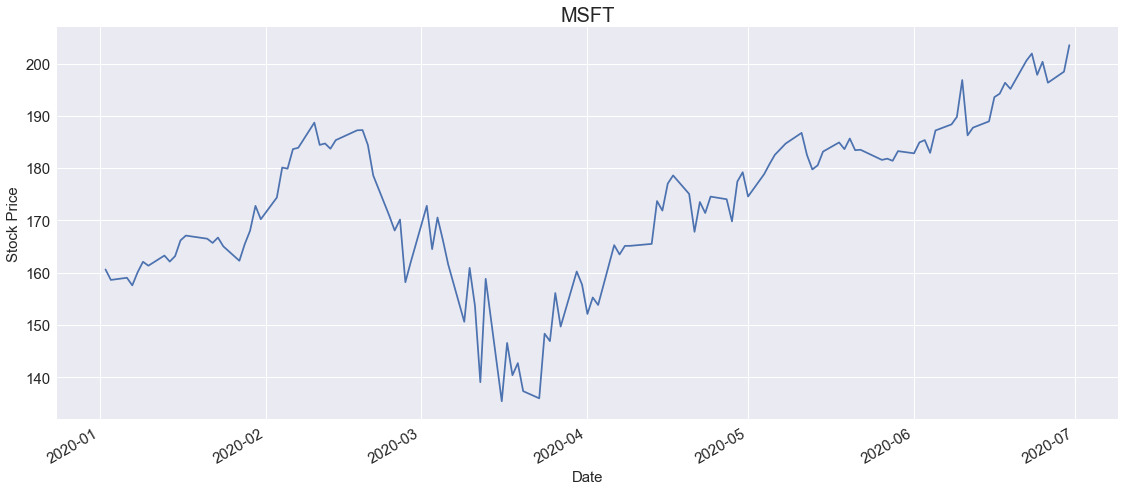

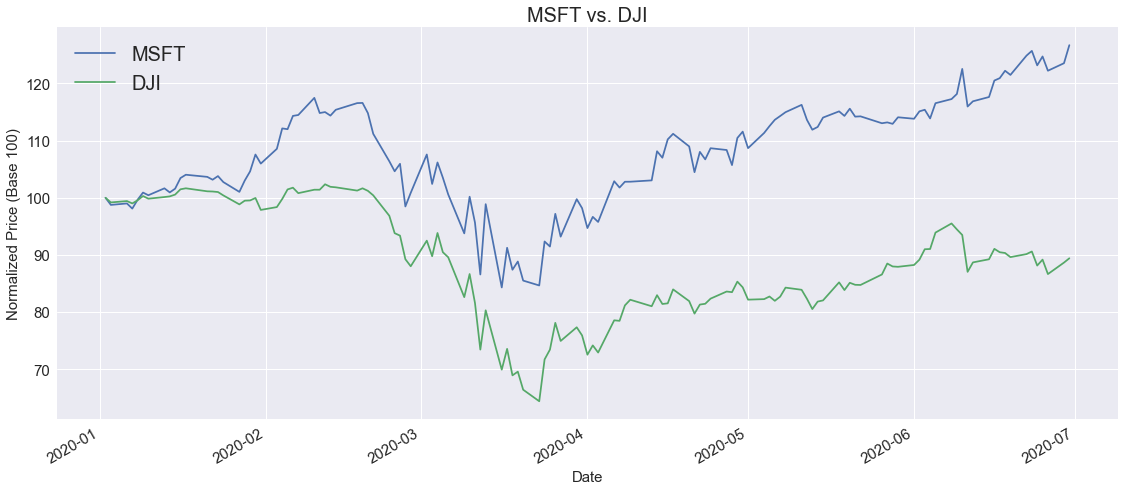

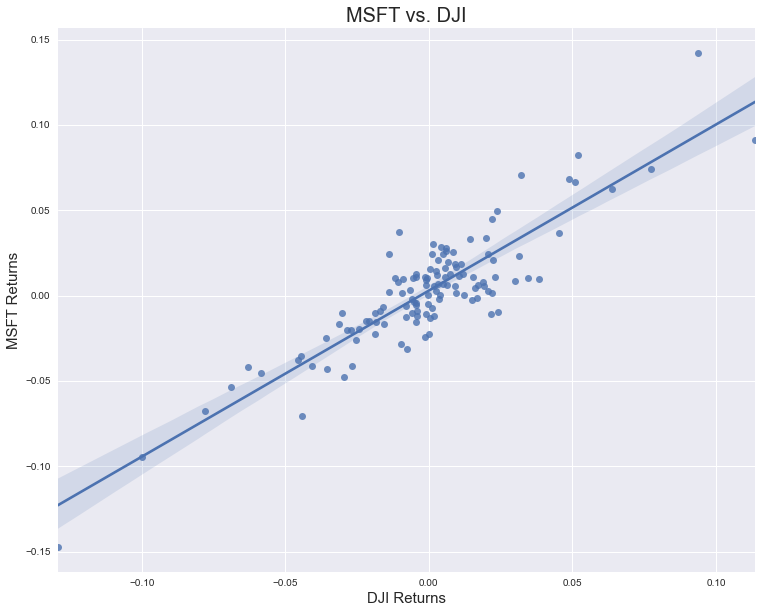

In [38]:
main()